# Analyse de données des facteurs influançant le temps de soumission du mémoire de sortie

## 1- Analyse exploratoire des données

### 1.1 Importation des librairies nécessaires

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from dateutil.relativedelta import relativedelta

### 1.2 Importation de la base de données et changement de nom des variables

In [2]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 66)

### Dataset with only codes

In [3]:
# data = pd.read_csv("C:/Users/Davidson Adrien/Documents/Davidson/Mémoire/Mémoire_Script/Mem_data_code.csv", 
#                    parse_dates = True)
# data.drop(['instanceName', '_id', '_uuid', '_submission_time',
#        '_date_modified', '_tags', '_notes', '_version', '_duration',
#        '_submitted_by', '_total_media', '_media_count', '_media_all_received',
#        '_xform_id'], axis = 1, inplace = True)


# data.rename(columns = {'Consentez-vous à répondre aux questions qui suivent ?':'consent',
#                       'Quel est votre sexe?':'sexe',
#                       "A quelle tranche d'âge appartenez-vous?":'tranche_age',
#                       "Où avez-vous complété vos études secondaires?":'loc_etud_sec',
#                       "Dans quel type d'établissement secondaire avez-vous fait la terminale (philo)?":'type_etab_term',
#                       'Préciser':'preciser_etab_term',
#                       "Dans quelle composante du système d'enseignement supérieur et universitaire haïtien avez-vous bouclé votre premier cycle universitaire?":"compos_seuh",
#                       "Préciser la faculté dans laquelle vous avez bouclé votre premier cycle universitaire.":'fac',
#                       "Vous y avez étudié quoi?":'etud_1',
#                       "Faisiez-vous d'autres études en parallèle?":'autr_etud',
#                       "Quelle(s) étude(s) faisiez-vous en parallèle?":'etud_2',
#                       "Selon vous, quelle approche utilisiez-vous le plus par rapport à vos cours quand vous étiez à l'université?":'approche',
#                       "En quelle année les cours de votre promotion ont-ils débuté ?":'annee_debut',
#                       "En quelle année vous auriez dû terminer avec les cours ?":'annee_fin_pot',
#                       "En quelle année les cours ont-ils réellement pris fin?":'annee_fin_reel',
#                       "Avez-vous déjà déposé votre travail de fin d'étude/mémoire?":'depot',
#                       "Après combien de temps (en mois), suite à la fin des cours (fin réelle), avez-vous déposé votre travail de fin d'étude?":'temps_depot',
#                       "Avez-vous déjà soutenu votre travail de fin d'étude?":'soutenance',
#                       "Après combien de temps (en mois), suite au dépôt du document, avez-vous soutenu votre travail de fin d'étude?":'temps_soutenance',
#                       "Comment qualifieriez-vous l'accompagnement que fournit l'établissement aux étudiants finissants pour leurs travaux de fin d'étude?":'qual_accomp',
#                       "Ajouter un commentaire concernant la qualification de l'accompagnement de votre établissement concernant le travail de fin d'étude.":'comment_accomp',
#                       "Après combien de temps avez-vous trouvé un emploi suite à vos études?":'temps_emploi',
#                       "Aviez/Avez-vous des contraintes qui vous empêchaient/empêchent de rédiger votre travail de fin d'études?":'contrainte',
#                       "contraintes/Aucun intérêt pour la rédaction du travail de fin d'étude":'contrainte_interet',
#                       "contraintes/Motivation":'contrainte_motivation',
#                       "contraintes/Accès à un ordinateur":'contrainte_ordi',
#                       "contraintes/Accès à l'électricité":'contrainte_elect',
#                       "contraintes/Accès à une bonne connexion Internet":'contrainte_internet',
#                       "contraintes/Le boulot":'contrainte_boulot',
#                       "contraintes/Problèmes familiaux":'contrainte_fam',
#                       "contraintes/Problèmes de santé":'contrainte_sante',
#                       "contraintes/Problèmes de notes à la fac":'contrainte_note',
#                       "contraintes/Problèmes financiers":'contrainte_finance',
#                       "contraintes/Fréquentation d'une autre faculté en parallèle":'contrainte_autr_etud',
#                       "contraintes/Difficulté à trouver un sujet de recherche":'contrainte_sujet_recherche',
#                       "contraintes/Sujet de recherche complexe":'contrainte_sujet_complexe',
#                       "contraintes/Données pour le travail non disponibles":'contrainte_donnees',
#                        "contraintes/Traitement et analyse des données":'contrainte_analyse_donnees',
#                       "contraintes/Manque d'encadrement académique":'contrainte_encadrement',
#                       "contraintes/Émigration":'contrainte_emigration',
#                       "contraintes/Autres":'contrainte_autre',
#                       "Préciser.1":'preciser_autr_contr',
#                       "Pensez-vous que vous êtes/étiez informé.e sur tous les aspects concernant le fonctionnement général d'un projet de travail de fin d'étude?":'info_tfe',
#                       "Pensez-vous que la rédaction du travail de fin d'étude soit un travail difficile?":'difficulte_tfe',
#                       "Préciser avec une petite argumentation votre position par rapport à la difficulté du travail.":'comment_difficulte',
#                       "Pensez-vous que la rédaction du travail de fin d'étude soit un exercice utile?":'utilite_tfe',
#                       "Préciser avec une petite argumentation votre position par rapport à l'utilité du travail.":'comment_utilite',
#                       "Aviez-vous un projet personnel qui était lié à votre domaine d'étude?":'projet_personnel',
#                       "Choisissez dans cette liste l'affirmation qui vous convient le mieux :":'choix_etud',
#                       "Sur une échelle de 0 à 5, à combien estimez-vous votre consommation de substance(s) psychoactive(s) pendant vos études (alcool, tabac, cannabis, cocaïne, ...) (0 = jamais ; 5 = chaque jour) ?":'consommation_pps',
#                       "Quel est le niveau d'éducation du membre de votre famille (père, mère, frère et soeur) le plus avancé académiquement quand vous étiez à votre dernière année à l'université?":'education_fam'
#                       }, inplace = True)


# data['annee_debut'] = pd.to_numeric(data['annee_debut'])

# data.head(2)

### Dataset with label

In [77]:
data1 = pd.read_csv("C:/Users/Davidson Adrien/Documents/Davidson/Mémoire/Mémoire_Script/Mem_data_label.csv", 
                   parse_dates = True)
data1.drop(['instanceName', '_id', '_uuid', '_date_modified', '_tags', '_notes', '_version', '_duration',
       '_submitted_by', '_total_media', '_media_count', '_media_all_received',
       '_xform_id'], axis = 1, inplace = True)


data1.rename(columns = {'Consentez-vous à répondre aux questions qui suivent ?':'consent',
                      'Quel est votre sexe?':'sexe',
                      "A quelle tranche d'âge appartenez-vous?":'tranche_age',
                      "Où avez-vous complété vos études secondaires?":'loc_etud_sec',
                      "Dans quel type d'établissement secondaire avez-vous fait la terminale (philo)?":'type_etab_term',
                      'Préciser':'preciser_etab_term',
                      "Dans quelle composante du système d'enseignement supérieur et universitaire haïtien avez-vous bouclé votre premier cycle universitaire?":"compos_seuh",
                      "Préciser la faculté dans laquelle vous avez bouclé votre premier cycle universitaire.":'fac',
                      "Vous y avez étudié quoi?":'etud_1',
                      "Faisiez-vous d'autres études en parallèle?":'autr_etud',
                      "Quelle(s) étude(s) faisiez-vous en parallèle?":'etud_2',
                      "Selon vous, quelle approche utilisiez-vous le plus par rapport à vos cours quand vous étiez à l'université?":'approche',
                      "En quelle année les cours de votre promotion ont-ils débuté ?":'annee_debut',
                      "En quelle année vous auriez dû terminer avec les cours ?":'annee_fin_pot',
                      "En quelle année les cours ont-ils réellement pris fin?":'annee_fin_reel',
                      "Avez-vous déjà déposé votre travail de fin d'étude/mémoire?":'depot',
                      "Après combien de temps (en mois), suite à la fin des cours (fin réelle), avez-vous déposé votre travail de fin d'étude?":'temps_depot',
                      "Avez-vous déjà soutenu votre travail de fin d'étude?":'soutenance',
                      "Après combien de temps (en mois), suite au dépôt du document, avez-vous soutenu votre travail de fin d'étude?":'temps_soutenance',
                      "Comment qualifieriez-vous l'accompagnement que fournit l'établissement aux étudiants finissants pour leurs travaux de fin d'étude?":'qual_accomp',
                      "Ajouter un commentaire concernant la qualification de l'accompagnement de votre établissement concernant le travail de fin d'étude.":'comment_accomp',
                      "Après combien de temps avez-vous trouvé un emploi suite à vos études?":'temps_emploi',
                      "Aviez/Avez-vous des contraintes qui vous empêchaient/empêchent de rédiger votre travail de fin d'études?":'contrainte',
                      "rubrique7/contraintes/Aucun intérêt pour la rédaction du travail de fin d'étude":'contrainte_interet',
                      "rubrique7/contraintes/Motivation":'contrainte_motivation',
                      "rubrique7/contraintes/Accès à un ordinateur":'contrainte_ordi',
                      "rubrique7/contraintes/Accès à l'électricité":'contrainte_elect',
                      "rubrique7/contraintes/Accès à une bonne connexion Internet":'contrainte_internet',
                      "rubrique7/contraintes/Le boulot":'contrainte_boulot',
                      "rubrique7/contraintes/Problèmes familiaux":'contrainte_fam',
                      "rubrique7/contraintes/Problèmes de santé":'contrainte_sante',
                      "rubrique7/contraintes/Problèmes de notes à la fac":'contrainte_note',
                      "rubrique7/contraintes/Problèmes financiers":'contrainte_finance',
                      "rubrique7/contraintes/Fréquentation d'une autre faculté en parallèle":'contrainte_autr_etud',
                      "rubrique7/contraintes/Difficulté à trouver un sujet de recherche":'contrainte_sujet_recherche',
                      "rubrique7/contraintes/Sujet de recherche complexe":'contrainte_sujet_complexe',
                      "rubrique7/contraintes/Données pour le travail non disponibles":'contrainte_donnees',
                       "rubrique7/contraintes/Traitement et analyse des données":'contrainte_analyse_donnees',
                      "rubrique7/contraintes/Manque d'encadrement académique":'contrainte_encadrement',
                      "rubrique7/contraintes/Émigration":'contrainte_emigration',
                      "rubrique7/contraintes/Autres":'contrainte_autre',
                      "Préciser.1":'preciser_autr_contr',
                      "Pensez-vous que vous êtes/étiez informé.e sur tous les aspects concernant le fonctionnement général d'un projet de travail de fin d'étude?":'info_tfe',
                      "Pensez-vous que la rédaction du travail de fin d'étude soit un travail difficile?":'difficulte_tfe',
                      "Préciser avec une petite argumentation votre position par rapport à la difficulté du travail.":'comment_difficulte',
                      "Pensez-vous que la rédaction du travail de fin d'étude soit un exercice utile?":'utilite_tfe',
                      "Préciser avec une petite argumentation votre position par rapport à l'utilité du travail.":'comment_utilite',
                      "Aviez-vous un projet personnel qui était lié à votre domaine d'étude?":'projet_personnel',
                      "Choisissez dans cette liste l'affirmation qui vous convient le mieux :":'choix_etud',
                      "Sur une échelle de 0 à 5, à combien estimez-vous votre consommation de substance(s) psychoactive(s) pendant vos études (alcool, tabac, cannabis, cocaïne, ...) (0 = jamais ; 5 = chaque jour) ?":'consommation_pps',
                      "Quel est le niveau d'éducation du membre de votre famille (père, mère, frère et soeur) le plus avancé académiquement quand vous étiez à votre dernière année à l'université?":'education_fam'
                      }, inplace = True)


data1['annee_debut'] = pd.to_numeric(data1['annee_debut'])

data1.head(2)

,consent,sexe,tranche_age,loc_etud_sec,type_etab_term,preciser_etab_term,compos_seuh,fac,etud_1,autr_etud,etud_2,approche,annee_debut,annee_fin_pot,annee_fin_reel,depot,temps_depot,soutenance,temps_soutenance,qual_accomp,comment_accomp,temps_emploi,contrainte,contrainte_interet,contrainte_motivation,contrainte_ordi,contrainte_elect,contrainte_internet,contrainte_boulot,contrainte_fam,contrainte_sante,contrainte_note,contrainte_finance,contrainte_autr_etud,contrainte_sujet_recherche,contrainte_sujet_complexe,contrainte_donnees,contrainte_analyse_donnees,contrainte_encadrement,contrainte_emigration,contrainte_autre,preciser_autr_contr,info_tfe,difficulte_tfe,comment_difficulte,utilite_tfe,comment_utilite,projet_personnel,choix_etud,consommation_pps,education_fam,instanceID,_submission_time
0,Oui,Homme,25 - 29 ans,Dans la zone métroplitaine de Port-au-Prince,Congréganiste,NaN,Institutions publiques d'enseignement supérieu...,CTPEA,Statistique,Non,NaN,Je répétais les cours en me centrant uniquemen...,2014.0,2018.0,2019.0,Non,NaN,NaN,NaN,Accompagnement moyen,Le professeur n'est pas disponible à 100%.,Pendant les études,Oui,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,Pas vraiment informé.e,Oui,Le manque de cours de méthodologie sérieux fai...,Oui,C'est utile parce que ce travail permet vraime...,Oui,Mon domaine d'étude était mon premier choix,1.0,Ecole professionnelle,uuid:6148ab3b-3869-4c64-9973-0bbe5527d3e5,2022-09-26T11:38:05
1,Oui,Homme,30 - 34 ans,Dans la zone métroplitaine de Port-au-Prince,Lycée,NaN,Institutions publiques d'enseignement supérieu...,Ctpea,"Économie appliquée, option statistique",Non,NaN,J'essayais de relier les idées et établir des ...,2009.0,2013.0,2013.0,Oui,18.0,Oui,16.0,Accompagnement médiocre,NaN,Pendant les études,Oui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,Assez informé.e,Oui,NaN,Oui,NaN,Non,Mon domaine d'étude était mon premier choix,0.0,Niveau d'études fondamentales (de la 1ère anné...,uuid:1e0a6ed3-3c19-49a7-8d24-1e595ef59e95,2022-09-26T12:19:18


In [78]:
#Estimation de la date de fin réelle de cours
data1['annee_fin_reel2'] = data1['annee_fin_reel']
data1['annee_fin_reel2'] = pd.to_datetime(data1['annee_fin_reel2'], format = '%Y')
data1['annee_fin_reel2'] = data1['annee_fin_reel2'] + pd.offsets.YearEnd()
data1['annee_fin_reel2'] = data1['annee_fin_reel2'] - pd.offsets.DateOffset(months=6)
#================================================================================================

#Creation de la colonne de durée depuis fin cours
data1['_submission_time'] = pd.to_datetime(data1['_submission_time'])
data1['_submission_time'] = data1['_submission_time'].dt.strftime('%Y-%m-%d')
data1['_submission_time'] = pd.to_datetime(data1['_submission_time'])

data1['temps_depuis_fin_cours'] = data1['_submission_time'] - data1['annee_fin_reel2']
data1['temps_depuis_fin_cours'] = round(data1['temps_depuis_fin_cours'].dt.days.apply(lambda x: x/30),0)
data1.head(10)

,consent,sexe,tranche_age,loc_etud_sec,type_etab_term,preciser_etab_term,compos_seuh,fac,etud_1,autr_etud,etud_2,approche,annee_debut,annee_fin_pot,annee_fin_reel,depot,temps_depot,soutenance,temps_soutenance,qual_accomp,comment_accomp,temps_emploi,contrainte,contrainte_interet,contrainte_motivation,contrainte_ordi,contrainte_elect,contrainte_internet,contrainte_boulot,contrainte_fam,contrainte_sante,contrainte_note,contrainte_finance,contrainte_autr_etud,contrainte_sujet_recherche,contrainte_sujet_complexe,contrainte_donnees,contrainte_analyse_donnees,contrainte_encadrement,contrainte_emigration,contrainte_autre,preciser_autr_contr,info_tfe,difficulte_tfe,comment_difficulte,utilite_tfe,comment_utilite,projet_personnel,choix_etud,consommation_pps,education_fam,instanceID,_submission_time,annee_fin_reel2,temps_depuis_fin_cours
0,Oui,Homme,25 - 29 ans,Dans la zone métroplitaine de Port-au-Prince,Congréganiste,NaN,Institutions publiques d'enseignement supérieu...,CTPEA,Statistique,Non,NaN,Je répétais les cours en me centrant uniquemen...,2014.0,2018.0,2019.0,Non,NaN,NaN,NaN,Accompagnement moyen,Le professeur n'est pas disponible à 100%.,Pendant les études,Oui,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,Pas vraiment informé.e,Oui,Le manque de cours de méthodologie sérieux fai...,Oui,C'est utile parce que ce travail permet vraime...,Oui,Mon domaine d'étude était mon premier choix,1.0,Ecole professionnelle,uuid:6148ab3b-3869-4c64-9973-0bbe5527d3e5,2022-09-26,2019-06-30,39.0
1,Oui,Homme,30 - 34 ans,Dans la zone métroplitaine de Port-au-Prince,Lycée,NaN,Institutions publiques d'enseignement supérieu...,Ctpea,"Économie appliquée, option statistique",Non,NaN,J'essayais de relier les idées et établir des ...,2009.0,2013.0,2013.0,Oui,18.0,Oui,16.0,Accompagnement médiocre,NaN,Pendant les études,Oui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,Assez informé.e,Oui,NaN,Oui,NaN,Non,Mon domaine d'étude était mon premier choix,0.0,Niveau d'études fondamentales (de la 1ère anné...,uuid:1e0a6ed3-3c19-49a7-8d24-1e595ef59e95,2022-09-26,2013-06-30,112.0
2,Oui,Homme,25 - 29 ans,Dans la zone métroplitaine de Port-au-Prince,Congréganiste,NaN,Institutions publiques d'enseignement supérieu...,CTPEA,Economie,Non,NaN,J'essayais de relier les idées et établir des ...,2014.0,2018.0,2019.0,Oui,30.0,Oui,4.0,Accompagnement moyen,NaN,Pendant les études,Oui,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,Assez informé.e,Non,NaN,Oui,NaN,Non,Mon domaine d'étude était fortement influencé ...,0.0,Étude universitaire,uuid:d3469b98-7755-44c5-a45b-0d598ad96ed8,2022-09-26,2019-06-30,39.0
3,Oui,Homme,25 - 29 ans,A l'extérieur de la zone métropolitaine de Por...,Congréganiste,NaN,Institutions publiques d'enseignement supérieu...,CTPEA,Stat,Non,NaN,Je répétais les cours en me centrant uniquemen...,2014.0,2018.0,2019.0,Non,NaN,NaN,NaN,Accompagnement médiocre,NaN,Moins de 6 mois,Oui,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Pas vraiment informé.e,Oui,NaN,Je ne sais pas,NaN,Oui,Mon domaine d'étude m'était imposé par mes pro...,1.0,Étude universitaire,uuid:66259bd1-db64-46ca-8de2-141cf0b22e93,2022-09-26,2019-06-30,39.0
4,Oui,Femme,25 - 29 ans,Dans la zone métroplitaine de Port-au-Prince,Congréganiste,NaN,Université d'Etat d'Haïti,Inaghei,Administration publique,Non,NaN,J'essayais de relier les idées et établir des ...,2015.0,2019.0,2020.0,Non,NaN,NaN,NaN,Accompagnement médiocre,Les etudiants sont quasiments livrés à eux-mêm...,Entre 1 à 2 ans,Oui,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,Pas vraiment informé.e,Oui,NaN,Oui,NaN,Non,Mon domaine d'étude était un choix résigné car...,0.0,Ecole professionnelle,uuid:398efcf4-ae34-4aac-919b-6d0f63900f02,2022-09-26,2020-06-30,27.0
5,Oui,Homme,25 - 29 ans,Dans la zone métroplitaine de Port-au-Prince,Congréganiste,NaN,Université d'Etat d'Haïti,Faculté de Droit et des Sciences Économi

In [79]:
data1[data1['depot'] == 'Oui'].shape[0]

84

In [80]:
# data1.to_excel('Domain_to_retrieve.xlsx', index = False)

### Lookup domain data

In [81]:
domain1 = pd.read_excel('C:\\Users\\Davidson Adrien\\Documents\\Davidson\\Mémoire\\Mémoire_Script\\Important_files\\lookup_domain.xlsx', sheet_name = 'etud1')
domain2 = pd.read_excel('C:\\Users\\Davidson Adrien\\Documents\\Davidson\\Mémoire\\Mémoire_Script\\Important_files\\lookup_domain.xlsx', sheet_name = 'etud2')

domain1.head(2)
domain2.head(2)

,etud_2,domaine_etud2
0,Psychologie,"Sciences sociales, journalisme et information"
1,Gestion des Ressources Humaines,Commerce administration et droit


In [82]:
data1['duree_etud_pot'] = data1.annee_fin_pot - data1.annee_debut
data1['duree_etud_reel'] = data1.annee_fin_reel - data1.annee_debut
data1['duree_etud_diff'] = data1.duree_etud_reel - data1.duree_etud_pot
data1[data1.duree_etud_diff < 0]

,consent,sexe,tranche_age,loc_etud_sec,type_etab_term,preciser_etab_term,compos_seuh,fac,etud_1,autr_etud,etud_2,approche,annee_debut,annee_fin_pot,annee_fin_reel,depot,temps_depot,soutenance,temps_soutenance,qual_accomp,comment_accomp,temps_emploi,contrainte,contrainte_interet,contrainte_motivation,contrainte_ordi,contrainte_elect,contrainte_internet,contrainte_boulot,contrainte_fam,contrainte_sante,contrainte_note,contrainte_finance,contrainte_autr_etud,contrainte_sujet_recherche,contrainte_sujet_complexe,contrainte_donnees,contrainte_analyse_donnees,contrainte_encadrement,contrainte_emigration,contrainte_autre,preciser_autr_contr,info_tfe,difficulte_tfe,comment_difficulte,utilite_tfe,comment_utilite,projet_personnel,choix_etud,consommation_pps,education_fam,instanceID,_submission_time,annee_fin_reel2,temps_depuis_fin_cours,duree_etud_pot,duree_etud_reel,duree_etud_diff


In [83]:
def generation(value):
    if value <= 1999:
        return "Génération 1990-1999"
    elif value <= 2011:
        return 'Génération 2002-2011'
    else:
        return "Génération après 2012"

data1['generation'] = data1['annee_debut'].map(generation)
data1.head(2)
    

,consent,sexe,tranche_age,loc_etud_sec,type_etab_term,preciser_etab_term,compos_seuh,fac,etud_1,autr_etud,etud_2,approche,annee_debut,annee_fin_pot,annee_fin_reel,depot,temps_depot,soutenance,temps_soutenance,qual_accomp,comment_accomp,temps_emploi,contrainte,contrainte_interet,contrainte_motivation,contrainte_ordi,contrainte_elect,contrainte_internet,contrainte_boulot,contrainte_fam,contrainte_sante,contrainte_note,contrainte_finance,contrainte_autr_etud,contrainte_sujet_recherche,contrainte_sujet_complexe,contrainte_donnees,contrainte_analyse_donnees,contrainte_encadrement,contrainte_emigration,contrainte_autre,preciser_autr_contr,info_tfe,difficulte_tfe,comment_difficulte,utilite_tfe,comment_utilite,projet_personnel,choix_etud,consommation_pps,education_fam,instanceID,_submission_time,annee_fin_reel2,temps_depuis_fin_cours,duree_etud_pot,duree_etud_reel,duree_etud_diff,generation
0,Oui,Homme,25 - 29 ans,Dans la zone métroplitaine de Port-au-Prince,Congréganiste,NaN,Institutions publiques d'enseignement supérieu...,CTPEA,Statistique,Non,NaN,Je répétais les cours en me centrant uniquemen...,2014.0,2018.0,2019.0,Non,NaN,NaN,NaN,Accompagnement moyen,Le professeur n'est pas disponible à 100%.,Pendant les études,Oui,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,Pas vraiment informé.e,Oui,Le manque de cours de méthodologie sérieux fai...,Oui,C'est utile parce que ce travail permet vraime...,Oui,Mon domaine d'étude était mon premier choix,1.0,Ecole professionnelle,uuid:6148ab3b-3869-4c64-9973-0bbe5527d3e5,2022-09-26,2019-06-30,39.0,4.0,5.0,1.0,Génération après 2012
1,Oui,Homme,30 - 34 ans,Dans la zone métroplitaine de Port-au-Prince,Lycée,NaN,Institutions publiques d'enseignement supérieu...,Ctpea,"Économie appliquée, option statistique",Non,NaN,J'essayais de relier les idées et établir des ...,2009.0,2013.0,2013.0,Oui,18.0,Oui,16.0,Accompagnement médiocre,NaN,Pendant les études,Oui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,Assez informé.e,Oui,NaN,Oui,NaN,Non,Mon domaine d'étude était mon premier choix,0.0,Niveau d'études fondamentales (de la 1ère anné...,uuid:1e0a6ed3-3c19-49a7-8d24-1e595ef59e95,2022-09-26,2013-06-30,112.0,4.0,4.0,0.0,Génération 2002-2011


In [1]:
# def recoded_temps_depot(value):
#     if value <= 20:
#         return "20_ou_moins"
#     elif value > 20:
#         return "plus_de_20"
#     else:
#         return "non_depot"

# data1['recoded_temps_depot'] = data1['temps_depot'].map(recoded_temps_depot)
# data1.head(2)

### Data wrangling: quelques ajustements pour les analyses

In [85]:
# Remplacement de valeurs

data1.loc[(data1.sexe == 'Homme'), 'sexe'] = 'M'
data1.loc[(data1.sexe == 'Femme'), 'sexe'] = 'F'

data1.loc[(data1.loc_etud_sec == 'Dans la zone métroplitaine de Port-au-Prince'), 'loc_etud_sec'] = 'AMP'
data1.loc[(data1.loc_etud_sec == "A l'extérieur de la zone métropolitaine de Port-au-Prince"), "loc_etud_sec"] = 'Hors_AMP'

data1.loc[(data1.compos_seuh == "Université d'Etat d'Haïti"), 'compos_seuh'] = 'Public_UEH'
data1.loc[(data1.compos_seuh == "Institutions publiques d'enseignement supérieur hors UEH"), 'compos_seuh'] = 'Public_non_UEH'
data1.loc[(data1.compos_seuh == "Institutions privées d'enseignement supérieur"), 'compos_seuh'] = 'Privé'

data1.loc[(data1.approche == "J'essayais de relier les idées et établir des rapports entre les différents cours du cursus"),
         'approche'] = 'Compréhension_Profonde'
data1.loc[(data1.approche == "Je répétais les cours en me centrant uniquement sur la préparation des examens"),
         'approche'] = 'Préparation_Exam'

data1.loc[(data1.qual_accomp == 'Accompagnement moyen'), 'qual_accomp'] = 'Moyen'
data1.loc[(data1.qual_accomp == 'Accompagnement médiocre'), 'qual_accomp'] = 'Médiocre'
data1.loc[(data1.qual_accomp == 'Accompagnement fort appréciable'), 'qual_accomp'] = 'Fort_appréciable'
data1.loc[(data1.qual_accomp == "Pas d'acompagnement"), 'qual_accomp'] = 'Aucun'

data1.loc[(data1.temps_emploi == 'Moins de 6 mois'), 'temps_emploi'] = 'moins_12'
data1.loc[(data1.temps_emploi == 'Pendant les études'), 'temps_emploi'] = 'Pendant_Etude'
data1.loc[(data1.temps_emploi == 'Entre 6 mois et 1 an'), 'temps_emploi'] = 'moins_12'
data1.loc[(data1.temps_emploi == "Je n'ai jamais travaillé après les études"), "temps_emploi"] = 'Chomage'
data1.loc[(data1.temps_emploi == 'Entre 1 à 2 ans'), 'temps_emploi'] = '12_24'
data1.loc[(data1.temps_emploi == 'Plus de 2 ans', 'temps_emploi')] = 'Plus_24'

data1.loc[(data1.info_tfe == 'Assez informé.e'), 'info_tfe'] = 'Assez'
data1.loc[(data1.info_tfe == 'Pas vraiment informé.e'), 'info_tfe'] = 'Pas_vraiment'
data1.loc[(data1.info_tfe == 'Très informé.e'), 'info_tfe'] = 'Très'
data1.loc[(data1.info_tfe == 'Pas informé.e du tout'), 'info_tfe'] = 'Pas_du_tout'

data1.loc[(data1.utilite_tfe == 'Je ne sais pas'), 'utilite_tfe'] = 'NSP'

data1.loc[(data1.choix_etud == "Mon domaine d'étude était mon premier choix"), 'choix_etud'] = 'Premier_choix'
data1.loc[(data1.choix_etud == "Mon domaine d'étude était un choix résigné car je n'ai pas eu la possibilité d'étudier ce que je voulais vraiment"),
         'choix_etud'] = 'Résigné'
data1.loc[(data1.choix_etud == "Mon domaine d'étude m'était imposé par mes proches et je n'ai jamais supporté le fait de faire carrière dans ce domaine"),
         'choix_etud'] = 'Influencé_pas_accepté'
data1.loc[(data1.choix_etud == "Mon domaine d'étude était fortement influencé par mes proches mais j'ai appris à l'accepter et à l'aimer"),
         'choix_etud'] = 'Influencé_accepté'

data1.loc[(data1.education_fam == 'Étude universitaire'), 'education_fam'] = 'Universitaire'
data1.loc[(data1.education_fam == 'Ecole professionnelle'), 'education_fam'] = 'Professionnelle'
data1.loc[(data1.education_fam == "Niveau d'études fondamentales (de la 1ère année jusqu'à la 9e année)"),
         'education_fam'] = 'Fondamentale'
data1.loc[(data1.education_fam == "Niveau d'études secondaires (de la 3e à la philo)"), 'education_fam'] = 'Secondaire'
data1.loc[(data1.education_fam == "Non scolarisé"), 'education_fam'] = 'Aucun'

data1.loc[(data1.etud_1 == 'STA'), 'etud_1'] = 'Science et technologie des aliments'

data1.loc[(data1.contrainte == 'Non'), 'contrainte_interet'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_motivation'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_ordi'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_elect'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_internet'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_boulot'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_fam'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_sante'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_note'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_finance'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_autr_etud'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_sujet_recherche'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_sujet_complexe'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_donnees'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_analyse_donnees'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_encadrement'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_emigration'] = 0
data1.loc[(data1.contrainte == 'Non'), 'contrainte_autre'] = 0

In [86]:
# muso_sheet['is_pvvih'] = muso_sheet['is_pvhiv'].where(muso_sheet['is_pvvih'].isin(["---"]), 
#                                            other=muso_sheet['is_pvvih'])

data1['temps_depot'] = data1['temps_depuis_fin_cours'].where(data1['temps_depot'].isna(), 
                                                             other=data1['temps_depot'])

In [87]:
data1.loc[(data1.preciser_etab_term == 'College'), 'type_etab_term'] = 'Laïque'
data1.loc[(data1.preciser_etab_term == 'Collège'), 'type_etab_term'] = 'Laïque'
data1.loc[(data1.preciser_etab_term == 'Roger Anglade'), 'type_etab_term'] = 'Laïque'

data1.loc[(data1.preciser_autr_contr.isin(['Activites proffessionnelles', 'Question professionnelle', 'Travail'])), 
          'contrainte_boulot'] = 1
data1.loc[(data1.preciser_autr_contr == "J'avais commencé une maitrise qui a pris tout mon temps"),
         'contrainte_autr_etud'] = 1
data1.loc[(data1.preciser_autr_contr == "La disponibilité de l'encadreur qui etait en pleine ceinture a deux reprises pendant la période de l'encadrement"),
         'contrainte_encadrement'] = 1
data1.loc[(data1.preciser_autr_contr == "Financement pour le travail terrain"), 'contrainte_finance'] = 1

data1.loc[((data1.etud_1 == 'Comptabilité') & (data1.etud_2 == 'Télécommunications')), 'temps_depot'] = 2

data1.loc[(data1.temps_depot > 1000), 'temps_depot'] = (data1.temps_depot - data1.annee_fin_reel)*12
data1.loc[((data1.temps_depot == 50) & (data1.temps_soutenance == 60)), 'temps_soutenance'] = 10
data1.loc[((data1.annee_fin_reel == 2019) & (data1.temps_depot == 2) & (data1.temps_soutenance == 2019)),
         'temps_soutenance'] = 2

In [88]:
data1.columns

Index(['consent', 'sexe', 'tranche_age', 'loc_etud_sec', 'type_etab_term',
       'preciser_etab_term', 'compos_seuh', 'fac', 'etud_1', 'autr_etud',
       'etud_2', 'approche', 'annee_debut', 'annee_fin_pot', 'annee_fin_reel',
       'depot', 'temps_depot', 'soutenance', 'temps_soutenance', 'qual_accomp',
       'comment_accomp', 'temps_emploi', 'contrainte', 'contrainte_interet',
       'contrainte_motivation', 'contrainte_ordi', 'contrainte_elect',
       'contrainte_internet', 'contrainte_boulot', 'contrainte_fam',
       'contrainte_sante', 'contrainte_note', 'contrainte_finance',
       'contrainte_autr_etud', 'contrainte_sujet_recherche',
       'contrainte_sujet_complexe', 'contrainte_donnees',
       'contrainte_analyse_donnees', 'contrainte_encadrement',
       'contrainte_emigration', 'contrainte_autre', 'preciser_autr_contr',
       'info_tfe', 'difficulte_tfe', 'comment_difficulte', 'utilite_tfe',
       'comment_utilite', 'projet_personnel', 'choix_etud', 'consommation_pp

In [89]:
data1 = data1.merge(domain1[['etud_1', 'domaine_etud1']], on = 'etud_1', how = 'left')
data1 = data1.merge(domain2[['etud_2', 'domaine_etud2']], on = 'etud_2', how = 'left')

data1.head(2)

,consent,sexe,tranche_age,loc_etud_sec,type_etab_term,preciser_etab_term,compos_seuh,fac,etud_1,autr_etud,etud_2,approche,annee_debut,annee_fin_pot,annee_fin_reel,depot,temps_depot,soutenance,temps_soutenance,qual_accomp,comment_accomp,temps_emploi,contrainte,contrainte_interet,contrainte_motivation,contrainte_ordi,contrainte_elect,contrainte_internet,contrainte_boulot,contrainte_fam,contrainte_sante,contrainte_note,contrainte_finance,contrainte_autr_etud,contrainte_sujet_recherche,contrainte_sujet_complexe,contrainte_donnees,contrainte_analyse_donnees,contrainte_encadrement,contrainte_emigration,contrainte_autre,preciser_autr_contr,info_tfe,difficulte_tfe,comment_difficulte,utilite_tfe,comment_utilite,projet_personnel,choix_etud,consommation_pps,education_fam,instanceID,_submission_time,annee_fin_reel2,temps_depuis_fin_cours,duree_etud_pot,duree_etud_reel,duree_etud_diff,generation,recoded_temps_depot,domaine_etud1,domaine_etud2
0,Oui,M,25 - 29 ans,AMP,Congréganiste,NaN,Public_non_UEH,CTPEA,Statistique,Non,NaN,Préparation_Exam,2014.0,2018.0,2019.0,Non,39.0,NaN,NaN,Moyen,Le professeur n'est pas disponible à 100%.,Pendant_Etude,Oui,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,Pas_vraiment,Oui,Le manque de cours de méthodologie sérieux fai...,Oui,C'est utile parce que ce travail permet vraime...,Oui,Premier_choix,1.0,Professionnelle,uuid:6148ab3b-3869-4c64-9973-0bbe5527d3e5,2022-09-26,2019-06-30,39.0,4.0,5.0,1.0,Génération après 2012,non_depot,"Sciences naturelles, mathématiques et statisti...",NaN
1,Oui,M,30 - 34 ans,AMP,Lycée,NaN,Public_non_UEH,Ctpea,"Économie appliquée, option statistique",Non,NaN,Compréhension_Profonde,2009.0,2013.0,2013.0,Oui,18.0,Oui,16.0,Médiocre,NaN,Pendant_Etude,Oui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,Assez,Oui,NaN,Oui,NaN,Non,Premier_choix,0.0,Fondamentale,uuid:1e0a6ed3-3c19-49a7-8d24-1e595ef59e95,2022-09-26,2013-06-30,112.0,4.0,4.0,0.0,Génération 2002-2011,20_ou_moins,"Sciences naturelles, mathématiques et statisti...",NaN


In [90]:
data1[data1['depot'] == 'Oui'].shape[0]

84

In [91]:
# data1.to_excel('Test2.xlsx', index = False)

In [94]:
#Compute promotion column
#Final database
data_mod = data1.copy()
data_mod = data_mod[data_mod.consent == 'Oui']
data_mod['annee_debut'] = data_mod['annee_debut'].astype(int)
data_mod['annee_fin_pot'] = data_mod['annee_fin_pot'].astype(int)
data_mod['promotion'] = data_mod['annee_debut'].astype(str) + ' - ' + data_mod['annee_fin_pot'].astype(str)

data_model2 = data_mod[['consent', 'sexe', 'tranche_age', 'loc_etud_sec', 'type_etab_term',
       'preciser_etab_term', 'compos_seuh', 'fac', 'etud_1', 'domaine_etud1', 'autr_etud',
       'etud_2', 'domaine_etud2', 'approche', 'promotion', 'generation', 'depot', 'temps_depot',
                        'soutenance', 'temps_soutenance', 'duree_etud_pot', 'duree_etud_reel',
       'duree_etud_diff', 'qual_accomp',
       'comment_accomp', 'temps_emploi', 'contrainte', 'contrainte_interet',
       'contrainte_motivation', 'contrainte_ordi', 'contrainte_elect',
       'contrainte_internet', 'contrainte_boulot', 'contrainte_fam',
       'contrainte_sante', 'contrainte_note', 'contrainte_finance',
       'contrainte_autr_etud', 'contrainte_sujet_recherche',
       'contrainte_sujet_complexe', 'contrainte_donnees',
       'contrainte_analyse_donnees', 'contrainte_encadrement',
       'contrainte_emigration', 'contrainte_autre', 'preciser_autr_contr',
       'info_tfe', 'difficulte_tfe', 'comment_difficulte', 'utilite_tfe',
       'comment_utilite', 'projet_personnel', 'choix_etud', 'consommation_pps',
       'education_fam']]

data_model2.loc[(data_model2['temps_depot'] == -9), 'temps_depot'] = 0
data_model2.head(2)

,consent,sexe,tranche_age,loc_etud_sec,type_etab_term,preciser_etab_term,compos_seuh,fac,etud_1,domaine_etud1,autr_etud,etud_2,domaine_etud2,approche,promotion,generation,depot,temps_depot,recoded_temps_depot,soutenance,temps_soutenance,duree_etud_pot,duree_etud_reel,duree_etud_diff,qual_accomp,comment_accomp,temps_emploi,contrainte,contrainte_interet,contrainte_motivation,contrainte_ordi,contrainte_elect,contrainte_internet,contrainte_boulot,contrainte_fam,contrainte_sante,contrainte_note,contrainte_finance,contrainte_autr_etud,contrainte_sujet_recherche,contrainte_sujet_complexe,contrainte_donnees,contrainte_analyse_donnees,contrainte_encadrement,contrainte_emigration,contrainte_autre,preciser_autr_contr,info_tfe,difficulte_tfe,comment_difficulte,utilite_tfe,comment_utilite,projet_personnel,choix_etud,consommation_pps,education_fam
0,Oui,M,25 - 29 ans,AMP,Congréganiste,NaN,Public_non_UEH,CTPEA,Statistique,"Sciences naturelles, mathématiques et statisti...",Non,NaN,NaN,Préparation_Exam,2014 - 2018,Génération après 2012,Non,39.0,non_depot,NaN,NaN,4.0,5.0,1.0,Moyen,Le professeur n'est pas disponible à 100%.,Pendant_Etude,Oui,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,Pas_vraiment,Oui,Le manque de cours de méthodologie sérieux fai...,Oui,C'est utile parce que ce travail permet vraime...,Oui,Premier_choix,1.0,Professionnelle
1,Oui,M,30 - 34 ans,AMP,Lycée,NaN,Public_non_UEH,Ctpea,"Économie appliquée, option statistique","Sciences naturelles, mathématiques et statisti...",Non,NaN,NaN,Compréhension_Profonde,2009 - 2013,Génération 2002-2011,Oui,18.0,20_ou_moins,Oui,16.0,4.0,4.0,0.0,Médiocre,NaN,Pendant_Etude,Oui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,Assez,Oui,NaN,Oui,NaN,Non,Premier_choix,0.0,Fondamentale


In [95]:
data_model2.to_excel('Data_model22.xlsx', index = False)

### Dataset for constraints

In [45]:
data_contrainte = data_mod[['depot', 'temps_depot', 'contrainte_interet',
       'contrainte_motivation', 'contrainte_ordi', 'contrainte_elect',
       'contrainte_internet', 'contrainte_boulot', 'contrainte_fam',
       'contrainte_sante', 'contrainte_note', 'contrainte_finance',
       'contrainte_autr_etud', 'contrainte_sujet_recherche',
       'contrainte_sujet_complexe', 'contrainte_donnees',
       'contrainte_analyse_donnees', 'contrainte_encadrement',
       'contrainte_emigration', 'contrainte_autre', 'preciser_autr_contr']]

data_contrainte.loc[(data_contrainte.depot == "Oui"), 'depot'] = 1
data_contrainte.loc[(data_contrainte.depot == "Non"), 'depot'] = 0

data_contrainte.head(2)

,depot,temps_depot,contrainte_interet,contrainte_motivation,contrainte_ordi,contrainte_elect,contrainte_internet,contrainte_boulot,contrainte_fam,contrainte_sante,contrainte_note,contrainte_finance,contrainte_autr_etud,contrainte_sujet_recherche,contrainte_sujet_complexe,contrainte_donnees,contrainte_analyse_donnees,contrainte_encadrement,contrainte_emigration,contrainte_autre,preciser_autr_contr
0,0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [46]:
data_contrainte.to_excel('Dataset_contrainte.xlsx', index = False)

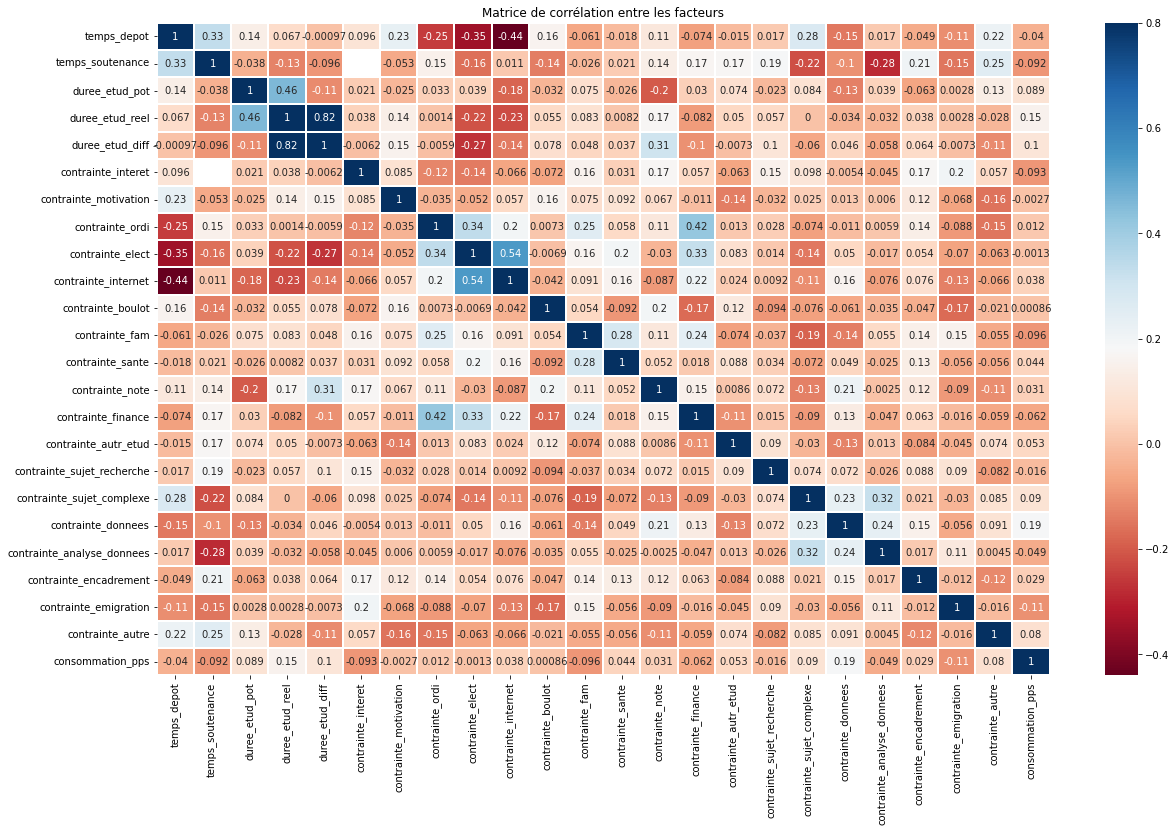

In [19]:
corr = data_model2.corr(method = 'spearman')
plt.figure(figsize = (20, 12))
cor = sns.heatmap(corr, vmax = 0.8, linewidths = 0.01, square = False, annot = True, cmap = 'RdBu')
cor.set_title('Matrice de corrélation entre les facteurs')
plt.savefig('Matrix.png', bbox_inches='tight')


In [20]:
# plt.savefig()
plt.savefig('Matrix.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [21]:
data_mod[data_mod.contrainte == 'Non'].shape

(43, 60)

In [ ]:
corr = d

### 1.3 Analyse de forme

#### Rows and Columns

In [27]:
data1.shape

(182, 52)

#### Types de variables

In [28]:
data1.dtypes.value_counts()

object     28
float64    24
dtype: int64

#### Analyse des valeurs manquantes

<AxesSubplot:>

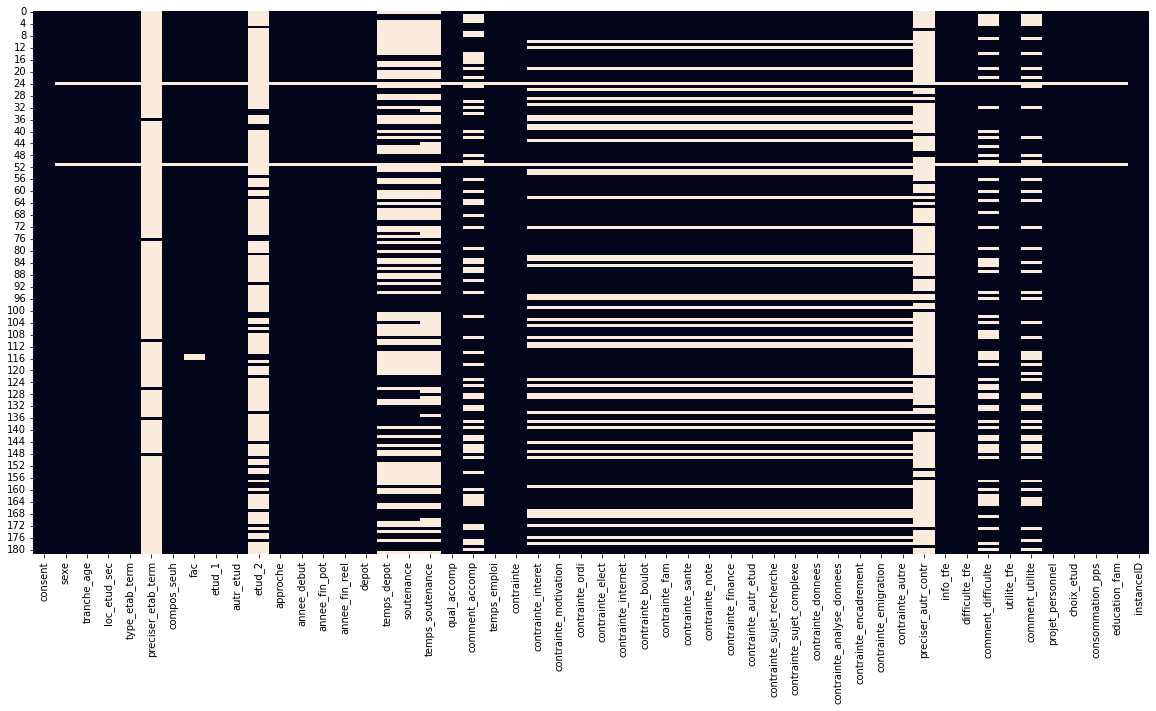

In [29]:
plt.figure(figsize = (20,10))
sns.heatmap(data1.isna(), cbar = False)

In [30]:
data1['depot'].value_counts()

Non    96
Oui    84
Name: depot, dtype: int64

In [21]:
data1.describe()

,annee_debut,annee_fin_pot,annee_fin_reel,temps_depot,temps_soutenance,contrainte_interet,contrainte_motivation,contrainte_ordi,contrainte_elect,contrainte_internet,contrainte_boulot,contrainte_fam,contrainte_sante,contrainte_note,contrainte_finance,contrainte_autr_etud,contrainte_sujet_recherche,contrainte_sujet_complexe,contrainte_donnees,contrainte_analyse_donnees,contrainte_encadrement,contrainte_emigration,contrainte_autre,consommation_pps,duree_etud_pot,duree_etud_reel,duree_etud_diff
count,181.000000,181.000000,181.000000,84.000000,76.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,181.000000,181.000000,181.000000,181.000000
mean,2012.779006,2016.955801,2017.723757,23.964286,6.552632,0.079710,0.492754,0.144928,0.318841,0.282609,0.391304,0.108696,0.065217,0.152174,0.195652,0.043478,0.173913,0.224638,0.463768,0.144928,0.528986,0.043478,0.195652,0.519337,4.176796,4.944751,0.767956
std,4.230288,4.233233,4.494557,20.215970,14.961635,0.271831,0.501769,0.353310,0.467725,0.451908,0.489820,0.312391,0.247809,0.360498,0.398147,0.204674,0.380416,0.418864,0.500502,0.353310,0.500978,0.204674,0.398147,0.799939,0.692590,1.205191,1.017224
min,1990.000000,1994.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2016.000000,2016.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000
50%,2014.000000,2018.000000,2019.000000,20.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,5.000000,1.000000
75%,2015.000000,2020.000000,2021.000000,36.000000,5.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,4.000000,5.000000,1.000000
max,2018.000000,2022.000000,2023.000000,120.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,9.000000,5.000000


### Contraintes analysis

In [61]:

data_contraint = data1[data1['contrainte'] == 'Oui'][['contrainte_interet', 'contrainte_motivation', 'contrainte_ordi', 'contrainte_elect', 
                        'contrainte_internet', 'contrainte_boulot', 'contrainte_fam', 'contrainte_sante',
                       'contrainte_note', 'contrainte_finance', 'contrainte_autr_etud', 'contrainte_sujet_recherche',
                       'contrainte_sujet_complexe', 'contrainte_donnees', 'contrainte_analyse_donnees',
                       'contrainte_encadrement', 'contrainte_emigration', 'contrainte_autre']]

data_contraint = pd.DataFrame((data_contraint.sum()/data_contraint.shape[0]).sort_values(ascending = False), 
                              columns = ['Occurence en %'])
data_contraint.reset_index(inplace = True)
data_contraint.rename(columns = {
    'index': 'contraintes'
}, inplace = True)
data_contraint['Occurence en %'] = round(data_contraint['Occurence en %']*100, 2)
data_contraint

,contraintes,Occurence en %
0,contrainte_encadrement,52.90
1,contrainte_motivation,49.28
2,contrainte_donnees,46.38
3,contrainte_boulot,39.13
4,contrainte_elect,31.88
5,contrainte_internet,28.26
6,contrainte_sujet_complexe,22.46
7,contrainte_finance,19.57
8,contrainte_autre,19.57
9,contrainte_sujet_recherche,17.39


In [62]:
data_contraint.to_excel('Occurence_contraintes.xlsx', index = False)

## Modélisation

In [34]:
df = data[['depot', 'sexe', 'loc_etud_sec', 'type_etab_term', 'compos_seuh', 'approche', 'qual_accomp', 
           'temps_emploi', 'contrainte', 'info_tfe', 'difficulte_tfe', 'utilite_tfe', 'projet_personnel', 'choix_etud',
          'consommation_pps', 'education_fam']]
df.head()

,depot,sexe,loc_etud_sec,type_etab_term,compos_seuh,approche,qual_accomp,temps_emploi,contrainte,info_tfe,difficulte_tfe,utilite_tfe,projet_personnel,choix_etud,consommation_pps,education_fam
0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0
1,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,0.0,2.0
2,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,3.0,0.0,5.0
3,2.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,4.0,1.0,5.0
4,2.0,2.0,1.0,2.0,1.0,2.0,3.0,4.0,1.0,3.0,1.0,1.0,2.0,2.0,0.0,4.0


In [35]:
df.to_excel('Dataset_mem.xlsx', index = False)

In [36]:
df1 = data[['consent','depot', 'sexe', 'loc_etud_sec', 'type_etab_term', 'compos_seuh', 'approche', 'qual_accomp', 
           'temps_emploi', 'contrainte', 'contrainte_interet',
       'contrainte_motivation', 'contrainte_ordi', 'contrainte_elect',
       'contrainte_internet', 'contrainte_boulot', 'contrainte_fam',
       'contrainte_sante', 'contrainte_note', 'contrainte_finance',
       'contrainte_autr_etud', 'contrainte_sujet_recherche',
       'contrainte_sujet_complexe', 'contrainte_donnees',
       'contrainte_analyse_donnees', 'contrainte_encadrement',
       'contrainte_emigration','info_tfe', 'difficulte_tfe', 'utilite_tfe', 'projet_personnel', 'choix_etud',
          'consommation_pps', 'education_fam']]

df1 = df1[df1['consent'] != 2]
df1.drop(['consent'], axis = 1, inplace = True)
df1.fillna(0, inplace = True)
df1.shape[0]

171

In [38]:
df1.to_excel('Dataset_cn.xlsx', index = False)

<AxesSubplot:>

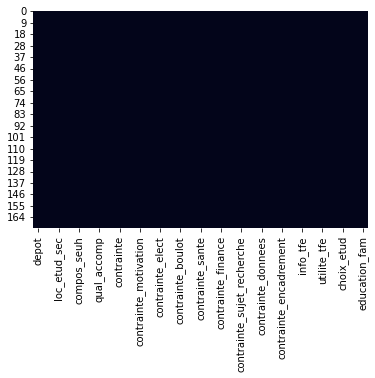

In [39]:
sns.heatmap(df1.isna(), cbar = False)